In [1]:
import pandas as pd
pd.set_option("display.max_rows", 1000)
import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats as st

In [2]:
data = pd.read_csv("../archive/pokemon.csv", low_memory= False)

In [3]:
legendary_pokemon =  data.loc[data["is_legendary"] == 1]
legendary_pokemon.head(30)


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
143,"['Pressure', 'Snow Cloak']",0.50,1.0,1.0,2.0,1.00,1.00,2.00,1.0,1.0,...,NaN,144,95,125,85,ice,flying,55.4,1,1
144,"['Pressure', 'Static']",0.50,1.0,1.0,1.0,1.00,0.50,1.00,0.5,1.0,...,NaN,145,125,90,100,electric,flying,52.6,1,1
145,"['Pressure', 'Flame Body']",0.25,1.0,1.0,2.0,0.50,0.50,0.50,1.0,1.0,...,NaN,146,125,85,90,fire,flying,60.0,1,1
149,"['Pressure', 'Unnerve']",2.00,2.0,1.0,1.0,1.00,0.50,1.00,1.0,2.0,...,NaN,150,194,120,140,psychic,NaN,122.0,1,1
150,['Synchronize'],2.00,2.0,1.0,1.0,1.00,0.50,1.00,1.0,2.0,...,NaN,151,100,100,100,psychic,NaN,4.0,1,1
242,"['Pressure', 'Inner Focus']",1.00,1.0,1.0,0.5,1.00,1.00,1.00,0.5,1.0,...,NaN,243,115,100,115,electric,NaN,178.0,2,1
243,"['Pressure', 'Inner Focus']",0.50,1.0,1.0,1.0,0.50,1.00,0.50,1.0,1.0,...,NaN,244,90,75,100,fire,NaN,198.0,2,1
244,"['Pressure', 'Inner Focus']",1.00,1.0,1.0,2.0,1.00,1.00,0.50,1.0,1.0,...,NaN,245,90,115,85,water,NaN,187.0,2,1
248,"['Pressure', 'Multiscale']",1.00,2.0,1.0,2.0,1.00,0.25,1.00,1.0,2.0,...,NaN,249,90,154,110,psychic,flying,216.0,2,1
249,"['Pressure', 'Regenerator']",0.25,1.0,1.0,2.0,0.50,0.50,0.50,1.0,1.0,...,NaN,250,110,154,90,fire,flying,199.0,2,1


In [4]:
legendary_pokemon.to_csv('legendary_pokemon.csv', index=False)

In [5]:
normal_pokemon = data.loc[data["is_legendary"] == 0]
normal_pokemon.head(5)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


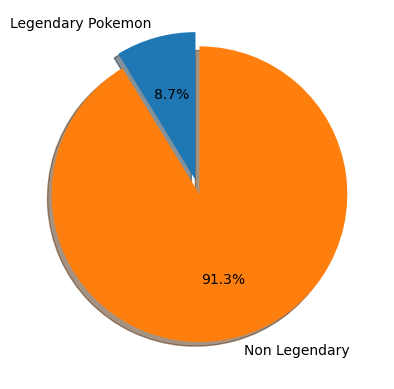

In [6]:
normal_pokemon_count = len(normal_pokemon)
legendary_pokemon_count = len(legendary_pokemon)
labels = 'Legendary Pokemon', 'Non Legendary'
sizes = [legendary_pokemon_count, normal_pokemon_count]
explode = (0.1, 0)
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels = labels, autopct='%1.1f%%', 
       shadow= True, startangle = 90)
plt.show()


In [7]:
normal_size = pd.DataFrame(normal_pokemon[["name","height_m", "weight_kg"]])
normal_size.head(50)

,name,height_m,weight_kg
0,Bulbasaur,0.7,6.9
1,Ivysaur,1.0,13.0
2,Venusaur,2.0,100.0
3,Charmander,0.6,8.5
4,Charmeleon,1.1,19.0
5,Charizard,1.7,90.5
6,Squirtle,0.5,9.0
7,Wartortle,1.0,22.5
8,Blastoise,1.6,85.5
9,Caterpie,0.3,2.9


In [8]:
legendary_pokemon_size = pd.DataFrame(legendary_pokemon[["name","height_m", "weight_kg"]])
legendary_pokemon_size

,name,height_m,weight_kg
143,Articuno,1.7,55.4
144,Zapdos,1.6,52.6
145,Moltres,2.0,60.0
149,Mewtwo,2.0,122.0
150,Mew,0.4,4.0
242,Raikou,1.9,178.0
243,Entei,2.1,198.0
244,Suicune,2.0,187.0
248,Lugia,5.2,216.0
249,Ho-Oh,3.8,199.0


In [9]:
legendary_types = legendary_pokemon.groupby("type1")
counted_legendary_types = legendary_types["type1"].count()
counted_legendary_types

type1
bug          3
dark         3
dragon       7
electric     5
fairy        1
fire         5
flying       1
ghost        1
grass        4
ground       2
ice          2
normal       3
psychic     17
rock         4
steel        6
water        6
Name: type1, dtype: int64

In [10]:
legendary_types_df = pd.DataFrame(legendary_types)
legendary_types_df

,0,1
0,bug,abilities against_bug against_dar...
1,dark,abilities against_bug against_dar...
2,dragon,abilities a...
3,electric,abilities ...
4,fairy,abilities against_bug against_dark...
5,fire,abilities against_bug...
6,flying,abilities ...
7,ghost,abilities ag...
8,grass,abilities against...
9,ground,abiliti...


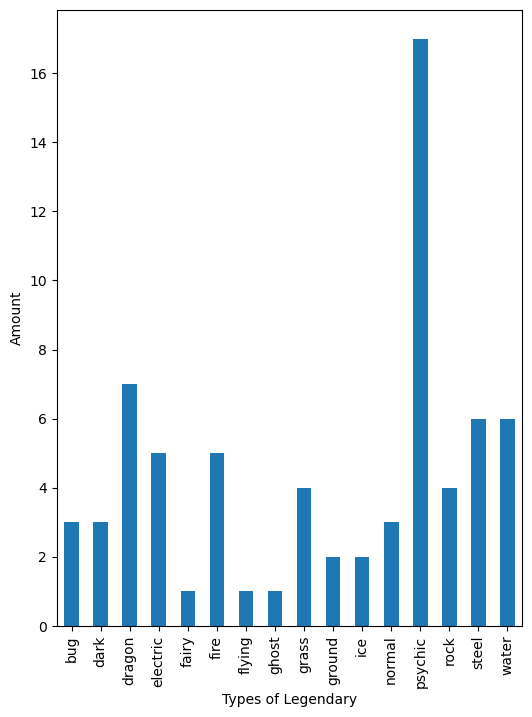

<Figure size 640x480 with 0 Axes>

In [11]:
count_chart =counted_legendary_types.plot(kind = 'bar', figsize= (6,8))
count_chart.set_xlabel("Types of Legendary")
count_chart.set_ylabel("Amount")
plt.show()
plt.tight_layout()

In [12]:
list(counted_legendary_types.index)

['bug',
 'dark',
 'dragon',
 'electric',
 'fairy',
 'fire',
 'flying',
 'ghost',
 'grass',
 'ground',
 'ice',
 'normal',
 'psychic',
 'rock',
 'steel',
 'water']

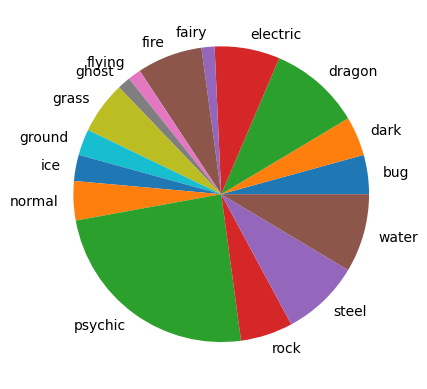

In [13]:
labels_L = list(counted_legendary_types.index)
sizes = counted_legendary_types
fig, ax = plt.subplots()
ax.pie(sizes, labels = labels_L)
plt.show()

In [14]:
legendary_pokemon_correlation_measurment = pd.DataFrame(legendary_pokemon[[ "hp", "experience_growth"]])
legendary_pokemon_correlation_measurment.corr().unstack().sort_values()


hp                 experience_growth   -0.032464
experience_growth  hp                  -0.032464
hp                 hp                   1.000000
experience_growth  experience_growth    1.000000
dtype: float64

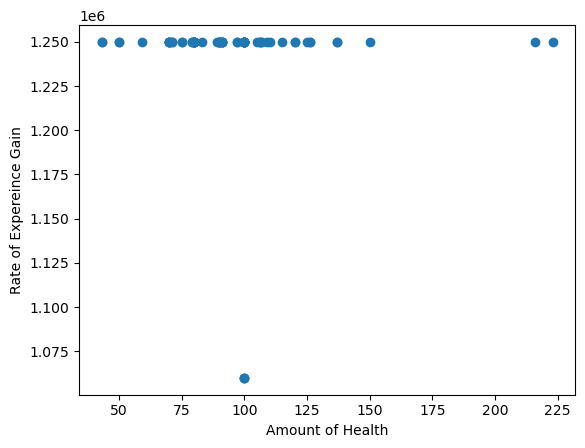

In [15]:
hp = legendary_pokemon["hp"]
experince_growth =  legendary_pokemon["experience_growth"]
plt.scatter(hp, experince_growth)
plt.xlabel("Amount of Health")
plt.ylabel("Rate of Expereince Gain")
plt.show()

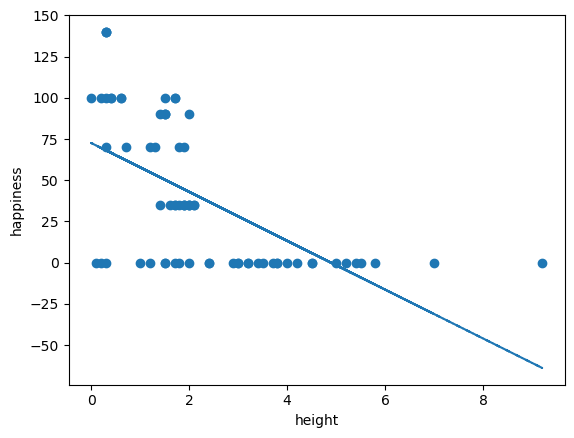

In [16]:
legendary_height = legendary_pokemon["height_m"].fillna(0)
legendary_happiness = legendary_pokemon["base_happiness"]
p_slope, p_int, p_r, p_p, p_std_err = st.linregress(legendary_height, legendary_happiness)
p_fit = p_slope * legendary_height + p_int
plt.scatter(legendary_height, legendary_happiness)
plt.plot(legendary_height, p_fit, "--")
#plt.xticks(legendary_height, rotation = 90)
plt.xlabel("height")
plt.ylabel("happiness")
plt.show()

In [17]:
legendary_happiness.head(50)

143     35
144     35
145     35
149      0
150    100
242     35
243     35
244     35
248      0
249      0
250    100
376     35
377     35
378     35
379     90
380     90
381      0
382      0
383      0
384    100
385      0
479    140
480    140
481    140
482      0
483      0
484    100
485      0
486      0
487    100
489     70
490      0
491    100
492      0
493    100
637     35
638     35
639     35
640     90
641     90
642      0
643      0
644     90
645      0
646     35
647    100
648      0
715      0
716      0
717      0
Name: base_happiness, dtype: int64

In [18]:
corr_h_w_legendary = legendary_pokemon[["height_m", "base_happiness"]].corr().iloc[0,1]

In [19]:

print(f"The correlation between legendary pokimon hieght and overall happiness is {round(corr_h_w_legendary,2)}")

The correlation between legendary pokimon hieght and overall happiness is -0.58


Text(0.5, 1.0, 'Relation of speed to height')

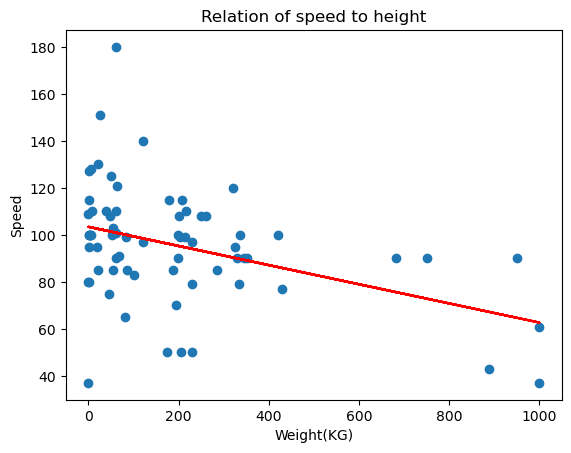

In [20]:
legendary_pokemon_speed = legendary_pokemon["speed"]
legendary_pokemon_weight = legendary_pokemon["weight_kg"].fillna(0)
p_slope, p_int, p_r, p_p, p_std_err = st.linregress(legendary_pokemon_weight, legendary_pokemon_speed)
p_fit = p_slope * legendary_pokemon_weight + p_int
plt.scatter(legendary_pokemon_weight, legendary_pokemon_speed)
plt.plot(legendary_pokemon_weight , p_fit, color = "red")
#plt.xticks(legendary_pokemon_weight.dropna(), rotation = 90)
plt.xlabel("Weight(KG)")
plt.ylabel("Speed")
plt.title("Relation of speed to height")

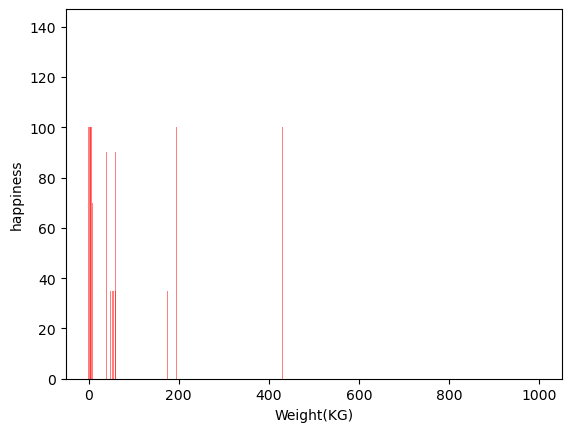

<Figure size 640x480 with 0 Axes>

In [21]:
legendary_pokemon_weight
legendary_happiness
plt.bar(legendary_pokemon_weight, legendary_happiness, color = 'r', alpha=0.5, align="center") 
plt.xlabel("Weight(KG)")
plt.ylabel("happiness")
plt.show()
plt.tight_layout()

In [22]:
legendary_pokemon_corr_series = legendary_pokemon.loc[:,legendary_pokemon.dtypes != "object"].drop(["percentage_male", "is_legendary"], axis=1).corr().unstack().sort_values()
legendary_pokemon_corr_series[legendary_pokemon_corr_series != 1]

against_fight      against_ghost       -0.595945
against_ghost      against_fight       -0.595945
height_m           base_happiness      -0.582625
base_happiness     height_m            -0.582625
against_bug        experience_growth   -0.493035
experience_growth  against_bug         -0.493035
against_dark       against_fight       -0.478661
against_fight      against_dark        -0.478661
weight_kg          base_happiness      -0.469895
base_happiness     weight_kg           -0.469895
against_ground     against_ice         -0.458042
against_ice        against_ground      -0.458042
against_bug        against_psychic     -0.450989
against_psychic    against_bug         -0.450989
                   against_dark        -0.448127
against_dark       against_psychic     -0.448127
against_fire       against_dragon      -0.424979
against_dragon     against_fire        -0.424979
against_ice        against_electric    -0.418663
against_electric   against_ice         -0.418663
speed              w

In [23]:
legendary_pokemon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, 143 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          70 non-null     object 
 1   against_bug        70 non-null     float64
 2   against_dark       70 non-null     float64
 3   against_dragon     70 non-null     float64
 4   against_electric   70 non-null     float64
 5   against_fairy      70 non-null     float64
 6   against_fight      70 non-null     float64
 7   against_fire       70 non-null     float64
 8   against_flying     70 non-null     float64
 9   against_ghost      70 non-null     float64
 10  against_grass      70 non-null     float64
 11  against_ground     70 non-null     float64
 12  against_ice        70 non-null     float64
 13  against_normal     70 non-null     float64
 14  against_poison     70 non-null     float64
 15  against_psychic    70 non-null     float64
 16  against_rock       70 non-null

In [52]:
legendary_pokemon = legendary_pokemon.rename(columns = {"type1": "TYPE"})
legendary_pokemon_ice = legendary_pokemon[legendary_pokemon["TYPE"] == "ice"]
legendary_pokemon_bug = legendary_pokemon[legendary_pokemon["TYPE"] == "bug"]
legendary_pokemon_dragon = legendary_pokemon[legendary_pokemon["TYPE"] == "dragon"]
legendary_pokemon_water = legendary_pokemon[legendary_pokemon["TYPE"] == "water"]
legendary_pokemon_steel = legendary_pokemon[legendary_pokemon["TYPE"] == "steel"]
legendary_pokemon_electric = legendary_pokemon[legendary_pokemon["TYPE"] == "electric"]
legendary_pokemon_fire = legendary_pokemon[legendary_pokemon["TYPE"] == "fire"]
legendary_pokemon_fairy = legendary_pokemon[legendary_pokemon["TYPE"] == "fairy"]
legendary_pokemon_dark = legendary_pokemon[legendary_pokemon["TYPE"] == "dark"]
legendary_pokemon_flying = legendary_pokemon[legendary_pokemon["TYPE"] == "flying"]
legendary_pokemon_ghost = legendary_pokemon[legendary_pokemon["TYPE"] == "ghost"]
legendary_pokemon_grass = legendary_pokemon[legendary_pokemon["TYPE"] == "grass"]
legendary_pokemon_ground = legendary_pokemon[legendary_pokemon["TYPE"] == "ground"]
legendary_pokemon_normal = legendary_pokemon[legendary_pokemon["TYPE"] == "normal"]
legendary_pokemon_psychic = legendary_pokemon[legendary_pokemon["TYPE"] == "psychic"]
legendary_pokemon_rock = legendary_pokemon[legendary_pokemon["TYPE"] == "rock"]
legendary_pokemon





,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,TYPE,type2,weight_kg,generation,is_legendary
143,"['Pressure', 'Snow Cloak']",0.50,1.0,1.0,2.00,1.00,1.00,2.00,1.0,1.0,...,NaN,144,95,125,85,ice,flying,55.4,1,1
144,"['Pressure', 'Static']",0.50,1.0,1.0,1.00,1.00,0.50,1.00,0.5,1.0,...,NaN,145,125,90,100,electric,flying,52.6,1,1
145,"['Pressure', 'Flame Body']",0.25,1.0,1.0,2.00,0.50,0.50,0.50,1.0,1.0,...,NaN,146,125,85,90,fire,flying,60.0,1,1
149,"['Pressure', 'Unnerve']",2.00,2.0,1.0,1.00,1.00,0.50,1.00,1.0,2.0,...,NaN,150,194,120,140,psychic,NaN,122.0,1,1
150,['Synchronize'],2.00,2.0,1.0,1.00,1.00,0.50,1.00,1.0,2.0,...,NaN,151,100,100,100,psychic,NaN,4.0,1,1
242,"['Pressure', 'Inner Focus']",1.00,1.0,1.0,0.50,1.00,1.00,1.00,0.5,1.0,...,NaN,243,115,100,115,electric,NaN,178.0,2,1
243,"['Pressure', 'Inner Focus']",0.50,1.0,1.0,1.00,0.50,1.00,0.50,1.0,1.0,...,NaN,244,90,75,100,fire,NaN,198.0,2,1
244,"['Pressure', 'Inner Focus']",1.00,1.0,1.0,2.00,1.00,1.00,0.50,1.0,1.0,...,NaN,245,90,115,85,water,NaN,187.0,2,1
248,"['Pressure', 'Multiscale']",1.00,2.0,1.0,2.00,1.00,0.25,1.00,1.0,2.0,...,NaN,249,90,154,110,psychic,flying,216.0,2,1
249,"['Pressure', 'Regenerator']",0.25,1.0,1.0,2.00,0.50,0.50,0.50,1.0,1.0,...,NaN,250,110,154,90,fire,flying,199.0,2,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


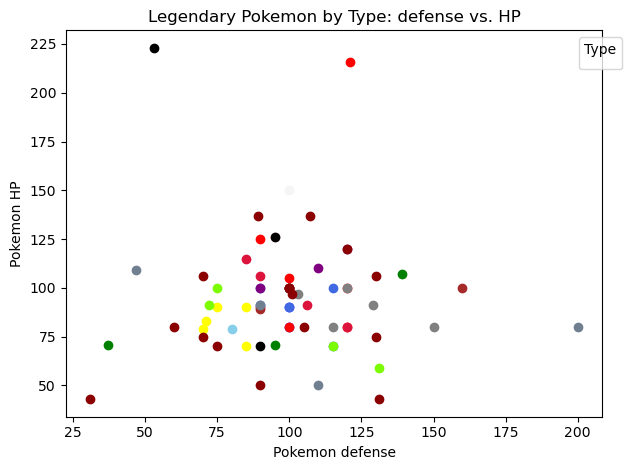

In [25]:
plt.scatter(legendary_pokemon_ice["defense"], legendary_pokemon_ice["hp"], color = "b")
plt.scatter(legendary_pokemon_bug["defense"], legendary_pokemon_bug["hp"], color = "g")
plt.scatter(legendary_pokemon_dragon["defense"], legendary_pokemon_dragon["hp"], color = "r")
plt.scatter(legendary_pokemon_water["defense"], legendary_pokemon_water["hp"], color = "royalblue")
plt.scatter(legendary_pokemon_steel["defense"], legendary_pokemon_steel["hp"], color = "grey")
plt.scatter(legendary_pokemon_electric["defense"], legendary_pokemon_electric["hp"], color = "yellow")
plt.scatter(legendary_pokemon_fire["defense"], legendary_pokemon_fire["hp"], color = "crimson")
plt.scatter(legendary_pokemon_fairy["defense"], legendary_pokemon_fairy["hp"], color = "pink")
plt.scatter(legendary_pokemon_dark["defense"], legendary_pokemon_dark["hp"], color = "black")
plt.scatter(legendary_pokemon_flying["defense"], legendary_pokemon_flying["hp"], color = "skyblue")
plt.scatter(legendary_pokemon_ghost["defense"], legendary_pokemon_ghost["hp"], color = "whitesmoke")
plt.scatter(legendary_pokemon_grass["defense"], legendary_pokemon_grass["hp"], color = "lawngreen")
plt.scatter(legendary_pokemon_ground["defense"], legendary_pokemon_ground["hp"], color = "brown")
plt.scatter(legendary_pokemon_normal["defense"], legendary_pokemon_normal["hp"], color = "purple")
plt.scatter(legendary_pokemon_psychic["defense"], legendary_pokemon_psychic["hp"], color = "darkred")
plt.scatter(legendary_pokemon_rock["defense"], legendary_pokemon_rock["hp"], color = "slategrey")
plt.xlabel("Pokemon defense")
plt.ylabel("Pokemon HP")
plt.title("Legendary Pokemon by Type: defense vs. HP")
plt.legend(title='Type', bbox_to_anchor=(1.05,1), loc='upper right')
plt.tight_layout()
plt.show()


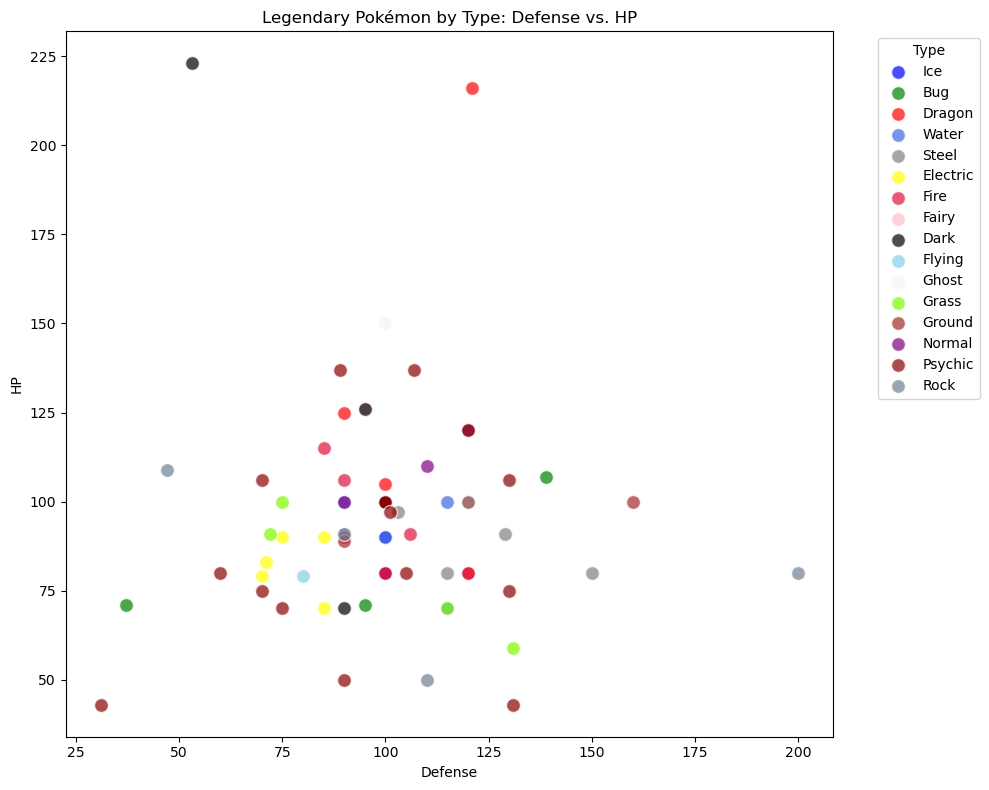

In [26]:
legendary_pokemon_types = {
    "ice": legendary_pokemon_ice,
    "bug": legendary_pokemon_bug,
    "dragon": legendary_pokemon_dragon,
    "water": legendary_pokemon_water,
    "steel": legendary_pokemon_steel,
    "electric": legendary_pokemon_electric,
    "fire": legendary_pokemon_fire,
    "fairy": legendary_pokemon_fairy,
    "dark": legendary_pokemon_dark,
    "flying": legendary_pokemon_flying,
    "ghost": legendary_pokemon_ghost,
    "grass": legendary_pokemon_grass,
    "ground": legendary_pokemon_ground,
    "normal": legendary_pokemon_normal,
    "psychic": legendary_pokemon_psychic,
    "rock": legendary_pokemon_rock,
}


colors = {
    "ice": "b",
    "bug": "g",
    "dragon": "r",
    "water": "royalblue",
    "steel": "grey",
    "electric": "yellow",
    "fire": "crimson",
    "fairy": "pink",
    "dark": "black",
    "flying": "skyblue",
    "ghost": "whitesmoke",
    "grass": "lawngreen",
    "ground": "brown",
    "normal": "purple",
    "psychic": "darkred",
    "rock": "slategrey",
}

plt.figure(figsize=(10, 8))  

for pokemon_type, df in legendary_pokemon_types.items():
    plt.scatter(df["defense"], df["hp"], color=colors[pokemon_type], label=pokemon_type.capitalize(), alpha=0.7, edgecolors='w', s=100)

plt.xlabel("Defense")
plt.ylabel("HP")
plt.title("Legendary Pokémon by Type: Defense vs. HP")
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.tight_layout() 
plt.show()

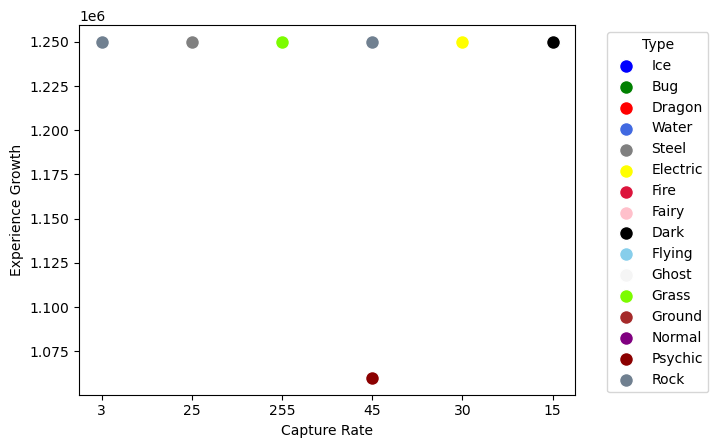

In [27]:
legendary_pokemon_types = {
    "ice": legendary_pokemon_ice,
    "bug": legendary_pokemon_bug,
    "dragon": legendary_pokemon_dragon,
    "water": legendary_pokemon_water,
    "steel": legendary_pokemon_steel,
    "electric": legendary_pokemon_electric,
    "fire": legendary_pokemon_fire,
    "fairy": legendary_pokemon_fairy,
    "dark": legendary_pokemon_dark,
    "flying": legendary_pokemon_flying,
    "ghost": legendary_pokemon_ghost,
    "grass": legendary_pokemon_grass,
    "ground": legendary_pokemon_ground,
    "normal": legendary_pokemon_normal,
    "psychic": legendary_pokemon_psychic,
    "rock": legendary_pokemon_rock,
}


colors = {
    "ice": "b",
    "bug": "g",
    "dragon": "r",
    "water": "royalblue",
    "steel": "grey",
    "electric": "yellow",
    "fire": "crimson",
    "fairy": "pink",
    "dark": "black",
    "flying": "skyblue",
    "ghost": "whitesmoke",
    "grass": "lawngreen",
    "ground": "brown",
    "normal": "purple",
    "psychic": "darkred",
    "rock": "slategrey",
}

for pokemon_type, df in legendary_pokemon_types.items():
    plt.scatter(df["capture_rate"],df["experience_growth"], color = colors[pokemon_type], label = pokemon_type.capitalize(), edgecolors="w", s=100)
    
plt.xlabel("Capture Rate")
plt.ylabel("Experience Growth")
plt.legend(title = "Type", bbox_to_anchor=(1.05, 1),loc="upper left")
plt.show()

In [31]:
pokemon_effectivness = {}
for index, row in legendary_pokemon.iterrows():
    name = row["name"]
    effectivness_data = {key: value for key, value in row.items() if key.startswith("against_")}
    pokemon_effectivness[name] = effectivness_data


{'Articuno': {'against_bug': 0.5, 'against_dark': 1.0, 'against_dragon': 1.0, 'against_electric': 2.0, 'against_fairy': 1.0, 'against_fight': 1.0, 'against_fire': 2.0, 'against_flying': 1.0, 'against_ghost': 1.0, 'against_grass': 0.5, 'against_ground': 0.0, 'against_ice': 1.0, 'against_normal': 1.0, 'against_poison': 1.0, 'against_psychic': 1.0, 'against_rock': 4.0, 'against_steel': 2.0, 'against_water': 1.0}, 'Zapdos': {'against_bug': 0.5, 'against_dark': 1.0, 'against_dragon': 1.0, 'against_electric': 1.0, 'against_fairy': 1.0, 'against_fight': 0.5, 'against_fire': 1.0, 'against_flying': 0.5, 'against_ghost': 1.0, 'against_grass': 0.5, 'against_ground': 0.0, 'against_ice': 2.0, 'against_normal': 1.0, 'against_poison': 1.0, 'against_psychic': 1.0, 'against_rock': 2.0, 'against_steel': 0.5, 'against_water': 1.0}, 'Moltres': {'against_bug': 0.25, 'against_dark': 1.0, 'against_dragon': 1.0, 'against_electric': 2.0, 'against_fairy': 0.5, 'against_fight': 0.5, 'against_fire': 0.5, 'against

In [37]:
def simulate_battle(pokemon1, pokemon2, pokemon_effectivness):
    hp1 = pokemon1["hp"]
    hp2 = pokemon2["hp"]
    while hp1 > 0 and hp2 > 0:
        effectivness1 = pokemon_effectivness[pokemon1['TYPE']][f"against_{pokemon2['TYPE']}"]
        effectivness2 = pokemon_effectivness[pokemon2["TYPE"]][f"against_{pokemon1['TYPE']}"]
        damage1 = max(pokemon1["attack"] * effectivness1 - pokemon2['defense'], 1)
        damage2 = max(pokemon2["attack"] * effectivness2 - pokemon1["defense"], 1)
        hp2 -= damage1
        if hp2 <= 0:
            break

        hp1 -= damage2
    
    if hp1 > 0:
        winner = pokemon1["name"]
    elif hp2 > 0:
        winner = pokemon2["name"]
    else:
        winner = "draw"
    return winner
simulate_battle()

In [41]:
participants = []
for participant in legendary_pokemon['name']:
    participants.append(participant)
participants

['Articuno',
 'Zapdos',
 'Moltres',
 'Mewtwo',
 'Mew',
 'Raikou',
 'Entei',
 'Suicune',
 'Lugia',
 'Ho-Oh',
 'Celebi',
 'Regirock',
 'Regice',
 'Registeel',
 'Latias',
 'Latios',
 'Kyogre',
 'Groudon',
 'Rayquaza',
 'Jirachi',
 'Deoxys',
 'Uxie',
 'Mesprit',
 'Azelf',
 'Dialga',
 'Palkia',
 'Heatran',
 'Regigigas',
 'Giratina',
 'Cresselia',
 'Manaphy',
 'Darkrai',
 'Shaymin',
 'Arceus',
 'Victini',
 'Cobalion',
 'Terrakion',
 'Virizion',
 'Tornadus',
 'Thundurus',
 'Reshiram',
 'Zekrom',
 'Landorus',
 'Kyurem',
 'Keldeo',
 'Meloetta',
 'Genesect',
 'Xerneas',
 'Yveltal',
 'Zygarde',
 'Diancie',
 'Hoopa',
 'Volcanion',
 'Tapu Koko',
 'Tapu Lele',
 'Tapu Bulu',
 'Tapu Fini',
 'Cosmog',
 'Cosmoem',
 'Solgaleo',
 'Lunala',
 'Nihilego',
 'Buzzwole',
 'Pheromosa',
 'Xurkitree',
 'Celesteela',
 'Kartana',
 'Guzzlord',
 'Necrozma',
 'Magearna']

In [62]:
def run_tournament(legendary_pokemon, pokemon_effectiveness):
    # If legendary_pokemon_df is not a DataFrame, create a DataFrame slice from the original DataFrame using the list of names
    participants = legendary_pokemon.copy()
    round_num = 1  # Assuming legendary_pokemon_df is already a DataFrame containing your participants
    
    while len(participants) > 1:
        print(f"/nRound {round_num}")
        winners = []
        for i in range(0, len(participants), 2):
            if i + 1 < len(participants):
                pokemon1 = participants.iloc[i].to_dict()
                pokemon2 = participants.iloc[i + 1].to_dict()
                winner_name = simulate_battle(pokemon1, pokemon2, pokemon_effectiveness)
                print(f" {pokemon1['name']} vs {pokemon2['name']} -> Winner: {winner_name}")
                winner = participants[participants['name'] == winner_name].iloc[0].to_dict()  # Find the winner by name
                winners.append(winner)  # Add the winner's dictionary to the list of winners
            else:
                print(f" {pokemon1['name']} advances automatically")
        # Convert the list of winners' dictionaries back to a DataFrame for the next round
        participants = pd.DataFrame(winners).reset_index(drop=True)
    
    print(f"The tournament winner is: {participants.iloc[0]['name']}")

run_tournament(legendary_pokemon, pokemon_effectivness)

/nRound 1
 Articuno vs Zapdos -> Winner: Articuno
 Moltres vs Mewtwo -> Winner: Mewtwo
 Mew vs Raikou -> Winner: Mew
 Entei vs Suicune -> Winner: Entei
 Lugia vs Ho-Oh -> Winner: Lugia
 Celebi vs Regirock -> Winner: Celebi
 Regice vs Registeel -> Winner: Regice
 Latias vs Latios -> Winner: Latias
 Kyogre vs Groudon -> Winner: Groudon
 Rayquaza vs Jirachi -> Winner: Rayquaza
 Deoxys vs Uxie -> Winner: Uxie
 Mesprit vs Azelf -> Winner: Mesprit
 Dialga vs Palkia -> Winner: Dialga
 Heatran vs Regigigas -> Winner: Regigigas
 Giratina vs Cresselia -> Winner: Cresselia
 Manaphy vs Darkrai -> Winner: Manaphy
 Shaymin vs Arceus -> Winner: Arceus
 Victini vs Cobalion -> Winner: Victini
 Terrakion vs Virizion -> Winner: Terrakion
 Tornadus vs Thundurus -> Winner: Tornadus
 Reshiram vs Zekrom -> Winner: Reshiram
 Landorus vs Kyurem -> Winner: Landorus
 Keldeo vs Meloetta -> Winner: Meloetta
 Genesect vs Xerneas -> Winner: Xerneas
 Yveltal vs Zygarde -> Winner: Yveltal
 Diancie vs Hoopa -> Winner: 

In [67]:
pokemon_effectivness = {}
for index, row in legendary_pokemon.iterrows():
    name = row["name"]
    effectivness_data = {key: value for key, value in row.items() if key.startswith("against_")}
    pokemon_effectivness[name] = effectivness_data

def simulate_battle(pokemon1, pokemon2, pokemon_effectiveness):
    hp1 = pokemon1["hp"]
    hp2 = pokemon2["hp"]
    while hp1 > 0 and hp2 > 0:
        # Retrieve effectiveness data based on Pokémon names
        effectiveness1_data = pokemon_effectiveness[pokemon1['name']]
        effectiveness2_data = pokemon_effectiveness[pokemon2['name']]

        # For each Pokémon, calculate effectiveness against the opponent's type
        effectiveness1 = effectiveness1_data.get(f"against_{pokemon2['TYPE']}", 1)
        effectiveness2 = effectiveness2_data.get(f"against_{pokemon1['TYPE']}", 1)

        # Calculate damage with effectiveness considered
        damage1 = max(pokemon1["attack"] * effectiveness1 - pokemon2['defense'], 1)
        damage2 = max(pokemon2["attack"] * effectiveness2 - pokemon1["defense"], 1)

        # Apply damage to HP
        hp2 -= damage1
        if hp2 <= 0:
            break
        hp1 -= damage2

    if hp1 > 0:
        return pokemon1["name"]
    elif hp2 > 0:
        return pokemon2["name"]
    else:
        return "draw"

def run_tournament(legendary_pokemon, pokemon_effectiveness):
    # If legendary_pokemon_df is not a DataFrame, create a DataFrame slice from the original DataFrame using the list of names
    participants = legendary_pokemon.copy()
    round_num = 1  # Assuming legendary_pokemon_df is already a DataFrame containing your participants
    
    while len(participants) > 1:
        print(f"/nRound {round_num}")
        winners = []
        round_num += 1
        for i in range(0, len(participants), 2):
            if i + 1 < len(participants):
                pokemon1 = participants.iloc[i].to_dict()
                pokemon2 = participants.iloc[i + 1].to_dict()
                winner_name = simulate_battle(pokemon1, pokemon2, pokemon_effectiveness)
                print(f" {pokemon1['name']} vs {pokemon2['name']} -> Winner: {winner_name}")
                winner = participants[participants['name'] == winner_name].iloc[0].to_dict()  # Find the winner by name
                winners.append(winner)  # Add the winner's dictionary to the list of winners
            else:
                print(f" {pokemon1['name']} advances automatically")
        # Convert the list of winners' dictionaries back to a DataFrame for the next round
        participants = pd.DataFrame(winners).reset_index(drop=True)
    
    print(f"The tournament winner is: {participants.iloc[0]['name']}")

run_tournament(legendary_pokemon, pokemon_effectivness)
    



/nRound 1
 Articuno vs Zapdos -> Winner: Articuno
 Moltres vs Mewtwo -> Winner: Mewtwo
 Mew vs Raikou -> Winner: Mew
 Entei vs Suicune -> Winner: Entei
 Lugia vs Ho-Oh -> Winner: Lugia
 Celebi vs Regirock -> Winner: Celebi
 Regice vs Registeel -> Winner: Regice
 Latias vs Latios -> Winner: Latias
 Kyogre vs Groudon -> Winner: Groudon
 Rayquaza vs Jirachi -> Winner: Rayquaza
 Deoxys vs Uxie -> Winner: Uxie
 Mesprit vs Azelf -> Winner: Mesprit
 Dialga vs Palkia -> Winner: Dialga
 Heatran vs Regigigas -> Winner: Regigigas
 Giratina vs Cresselia -> Winner: Cresselia
 Manaphy vs Darkrai -> Winner: Manaphy
 Shaymin vs Arceus -> Winner: Arceus
 Victini vs Cobalion -> Winner: Victini
 Terrakion vs Virizion -> Winner: Terrakion
 Tornadus vs Thundurus -> Winner: Tornadus
 Reshiram vs Zekrom -> Winner: Reshiram
 Landorus vs Kyurem -> Winner: Landorus
 Keldeo vs Meloetta -> Winner: Meloetta
 Genesect vs Xerneas -> Winner: Xerneas
 Yveltal vs Zygarde -> Winner: Yveltal
 Diancie vs Hoopa -> Winner: 

In [69]:
pokemon_effectivness = {}
for index, row in legendary_pokemon.iterrows():
    name = row["name"]
    effectivness_data = {key: value for key, value in row.items() if key.startswith("against_")}
    pokemon_effectivness[name] = effectivness_data

def simulate_battle(pokemon1, pokemon2, pokemon_effectiveness):
    hp1 = pokemon1["hp"]
    hp2 = pokemon2["hp"]
    while hp1 > 0 and hp2 > 0:
        # Retrieve effectiveness data based on Pokémon names
        effectiveness1_data = pokemon_effectiveness[pokemon1['name']]
        effectiveness2_data = pokemon_effectiveness[pokemon2['name']]

        # For each Pokémon, calculate effectiveness against the opponent's type
        effectiveness1 = effectiveness1_data.get(f"against_{pokemon2['TYPE']}", 1)
        effectiveness2 = effectiveness2_data.get(f"against_{pokemon1['TYPE']}", 1)

        # Calculate damage with effectiveness considered
        damage1 = max(pokemon1["attack"] * effectiveness1 - pokemon2['defense'], 1)
        damage2 = max(pokemon2["attack"] * effectiveness2 - pokemon1["defense"], 1)

        # Apply damage to HP
        hp2 -= damage1
        if hp2 <= 0:
            break
        hp1 -= damage2

    if hp1 > 0:
        return pokemon1["name"]
    elif hp2 > 0:
        return pokemon2["name"]
    else:
        return "draw"
def run_tournament_with_data(legendary_pokemon, pokemon_effectiveness):
    participants = legendary_pokemon.copy()
    matches = []  # To store data for visualization
    round_num = 1
    
    while len(participants) > 1:
        print(f"\nRound {round_num}")
        winners = []
        round_matches = []  # To store matches for the current round for visualization
        for i in range(0, len(participants), 2):
            if i + 1 < len(participants):
                pokemon1 = participants.iloc[i].to_dict()
                pokemon2 = participants.iloc[i + 1].to_dict()
                winner_name = simulate_battle(pokemon1, pokemon2, pokemon_effectiveness)
                print(f" {pokemon1['name']} vs {pokemon2['name']} -> Winner: {winner_name}")
                
                # Add the match to round_matches for visualization
                round_matches.append((pokemon1['name'], pokemon2['name'], winner_name))

                winner = participants[participants['name'] == winner_name].iloc[0].to_dict()
                winners.append(winner)
            else:
                print(f" {pokemon1['name']} advances automatically")
                winners.append(pokemon1)
                round_matches.append((pokemon1['name'], None, pokemon1['name']))  # For auto-advance cases

        participants = pd.DataFrame(winners).reset_index(drop=True)
        matches.append(round_matches)
        round_num += 1

    # After the tournament
    print(f"The tournament winner is: {participants.iloc[0]['name']}")
    return matches  # Return the structured data for visualization
run_tournament_with_data(legendary_pokemon, pokemon_effectivness)


Round 1
 Articuno vs Zapdos -> Winner: Articuno
 Moltres vs Mewtwo -> Winner: Mewtwo
 Mew vs Raikou -> Winner: Mew
 Entei vs Suicune -> Winner: Entei
 Lugia vs Ho-Oh -> Winner: Lugia
 Celebi vs Regirock -> Winner: Celebi
 Regice vs Registeel -> Winner: Regice
 Latias vs Latios -> Winner: Latias
 Kyogre vs Groudon -> Winner: Groudon
 Rayquaza vs Jirachi -> Winner: Rayquaza
 Deoxys vs Uxie -> Winner: Uxie
 Mesprit vs Azelf -> Winner: Mesprit
 Dialga vs Palkia -> Winner: Dialga
 Heatran vs Regigigas -> Winner: Regigigas
 Giratina vs Cresselia -> Winner: Cresselia
 Manaphy vs Darkrai -> Winner: Manaphy
 Shaymin vs Arceus -> Winner: Arceus
 Victini vs Cobalion -> Winner: Victini
 Terrakion vs Virizion -> Winner: Terrakion
 Tornadus vs Thundurus -> Winner: Tornadus
 Reshiram vs Zekrom -> Winner: Reshiram
 Landorus vs Kyurem -> Winner: Landorus
 Keldeo vs Meloetta -> Winner: Meloetta
 Genesect vs Xerneas -> Winner: Xerneas
 Yveltal vs Zygarde -> Winner: Yveltal
 Diancie vs Hoopa -> Winner: D

[[('Articuno', 'Zapdos', 'Articuno'),
  ('Moltres', 'Mewtwo', 'Mewtwo'),
  ('Mew', 'Raikou', 'Mew'),
  ('Entei', 'Suicune', 'Entei'),
  ('Lugia', 'Ho-Oh', 'Lugia'),
  ('Celebi', 'Regirock', 'Celebi'),
  ('Regice', 'Registeel', 'Regice'),
  ('Latias', 'Latios', 'Latias'),
  ('Kyogre', 'Groudon', 'Groudon'),
  ('Rayquaza', 'Jirachi', 'Rayquaza'),
  ('Deoxys', 'Uxie', 'Uxie'),
  ('Mesprit', 'Azelf', 'Mesprit'),
  ('Dialga', 'Palkia', 'Dialga'),
  ('Heatran', 'Regigigas', 'Regigigas'),
  ('Giratina', 'Cresselia', 'Cresselia'),
  ('Manaphy', 'Darkrai', 'Manaphy'),
  ('Shaymin', 'Arceus', 'Arceus'),
  ('Victini', 'Cobalion', 'Victini'),
  ('Terrakion', 'Virizion', 'Terrakion'),
  ('Tornadus', 'Thundurus', 'Tornadus'),
  ('Reshiram', 'Zekrom', 'Reshiram'),
  ('Landorus', 'Kyurem', 'Landorus'),
  ('Keldeo', 'Meloetta', 'Meloetta'),
  ('Genesect', 'Xerneas', 'Xerneas'),
  ('Yveltal', 'Zygarde', 'Yveltal'),
  ('Diancie', 'Hoopa', 'Diancie'),
  ('Volcanion', 'Tapu Koko', 'Volcanion'),
  ('Tapu Le

In [70]:
def draw_bracket(tournament_data):
    # Calculate the total number of rounds
    total_rounds = len(tournament_data)
    
    # Define spacing constants for the drawing
    vertical_spacing = 4
    horizontal_spacing = 2
    
    # Determine the figure size dynamically
    fig_height = 2 ** (total_rounds - 1) * vertical_spacing
    fig, ax = plt.subplots(figsize=(total_rounds * horizontal_spacing, fig_height))
    ax.axis('off')  # Hide the axes
    
    for round_index, round_data in enumerate(tournament_data, start=1):
        num_matches = len(round_data)
        for match_index, match in enumerate(round_data):
            participant1, participant2, winner = match
            # Calculate Y position. Each match's Y position depends on its order in the round and total matches.
            y_pos = -(match_index * vertical_spacing - num_matches * vertical_spacing / 2)
            # Display participant names and the winner
            ax.text(round_index * horizontal_spacing - 0.5, y_pos, participant1 or "", ha='right', va='center')
            ax.text(round_index * horizontal_spacing - 0.5, y_pos - 1, participant2 or "", ha='right', va='center')
            if round_index < total_rounds:  # Draw lines for all but the last round
                next_y_pos = -(match_index // 2 * vertical_spacing * 2 - num_matches * vertical_spacing / 2)
                ax.plot([round_index * horizontal_spacing, round_index * horizontal_spacing + 0.5], [y_pos - 0.5, next_y_pos - 0.5], color='grey')
                ax.text(round_index * horizontal_spacing + 0.5, next_y_pos - 0.5, winner, ha='left', va='center')
            else:  # For the last round, just display the overall winner
                ax.text(round_index * horizontal_spacing + 0.5, y_pos - 0.5, winner, ha='left', va='center')
    
    plt.tight_layout()
    plt.show()

# Example usage with your tournament data
tournament_data = [
    # Your tournament data here, formatted as shown in your message
]

draw_bracket(tournament_data)

LinAlgError: Singular matrix

c:\Users\Matt\anaconda3\envs\dev\lib\site-packages\matplotlib\_tight_bbox.py:67: RuntimeWarning: divide by zero encountered in scalar divide
  fig.patch.set_bounds(x0 / w1, y0 / h1,
c:\Users\Matt\anaconda3\envs\dev\lib\site-packages\matplotlib\_tight_bbox.py:68: RuntimeWarning: divide by zero encountered in scalar divide
  fig.bbox.width / w1, fig.bbox.height / h1)
c:\Users\Matt\anaconda3\envs\dev\lib\site-packages\matplotlib\patches.py:738: RuntimeWarning: invalid value encountered in scalar add
  x1 = self.convert_xunits(self._x0 + self._width)
c:\Users\Matt\anaconda3\envs\dev\lib\site-packages\matplotlib\transforms.py:2049: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[0, 2] += tx
